In [1]:
import scanpy as sc

import requests
import sys
from tqdm import tqdm
import pandas as pd

In [2]:
adata = sc.datasets.ebi_expression_atlas("E-ENAD-13")

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
genes = pd.read_csv("./mouse_genes.csv", index_col=0)

In [4]:
adata.var = adata.var.join(genes)

In [5]:
any(adata.var["gene_names"].duplicated())

True

apparently some gene names are duplicated. I will create a new column that has gene ID and gene name so that I can make dotplots more readable.

In [6]:
adata.var["annot"] = adata.var.index + " (" + adata.var["gene_names"].fillna("-") + ")"

In [7]:
any(adata.var["annot"].duplicated())

False

PFlog1pPF normalisation

In [8]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.normalize_total(adata)

In [9]:
sc.pp.highly_variable_genes(adata)

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [10]:
sc.tl.pca(adata, use_highly_variable=True, n_comps=100)

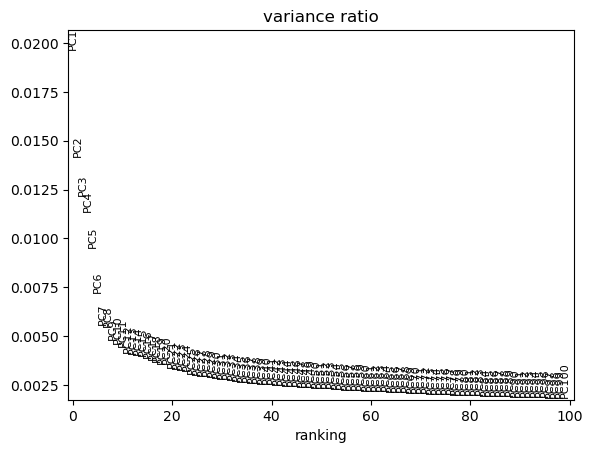

In [11]:
sc.pl.pca_variance_ratio(adata, n_pcs=100)

In [12]:
sc.pp.neighbors(adata, n_pcs=40, metric="cosine")
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=1)
adata.obs["putative"] = adata.obs["leiden"].copy()

In [13]:
adata.obs.columns

Index(['Sample Characteristic[organism]',
       'Sample Characteristic Ontology Term[organism]',
       'Sample Characteristic[strain]',
       'Sample Characteristic Ontology Term[strain]',
       'Sample Characteristic[individual]',
       'Sample Characteristic Ontology Term[individual]',
       'Sample Characteristic[age]',
       'Sample Characteristic Ontology Term[age]',
       'Sample Characteristic[organism part]',
       'Sample Characteristic Ontology Term[organism part]',
       'Sample Characteristic[cell type]',
       'Sample Characteristic Ontology Term[cell type]',
       'Sample Characteristic[genotype]',
       'Sample Characteristic Ontology Term[genotype]',
       'Sample Characteristic[inferred cell type - ontology labels]',
       'Sample Characteristic Ontology Term[inferred cell type - ontology labels]',
       'Sample Characteristic[immunophenotype]',
       'Sample Characteristic Ontology Term[immunophenotype]',
       'Factor Value[single cell identifier]',

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this w

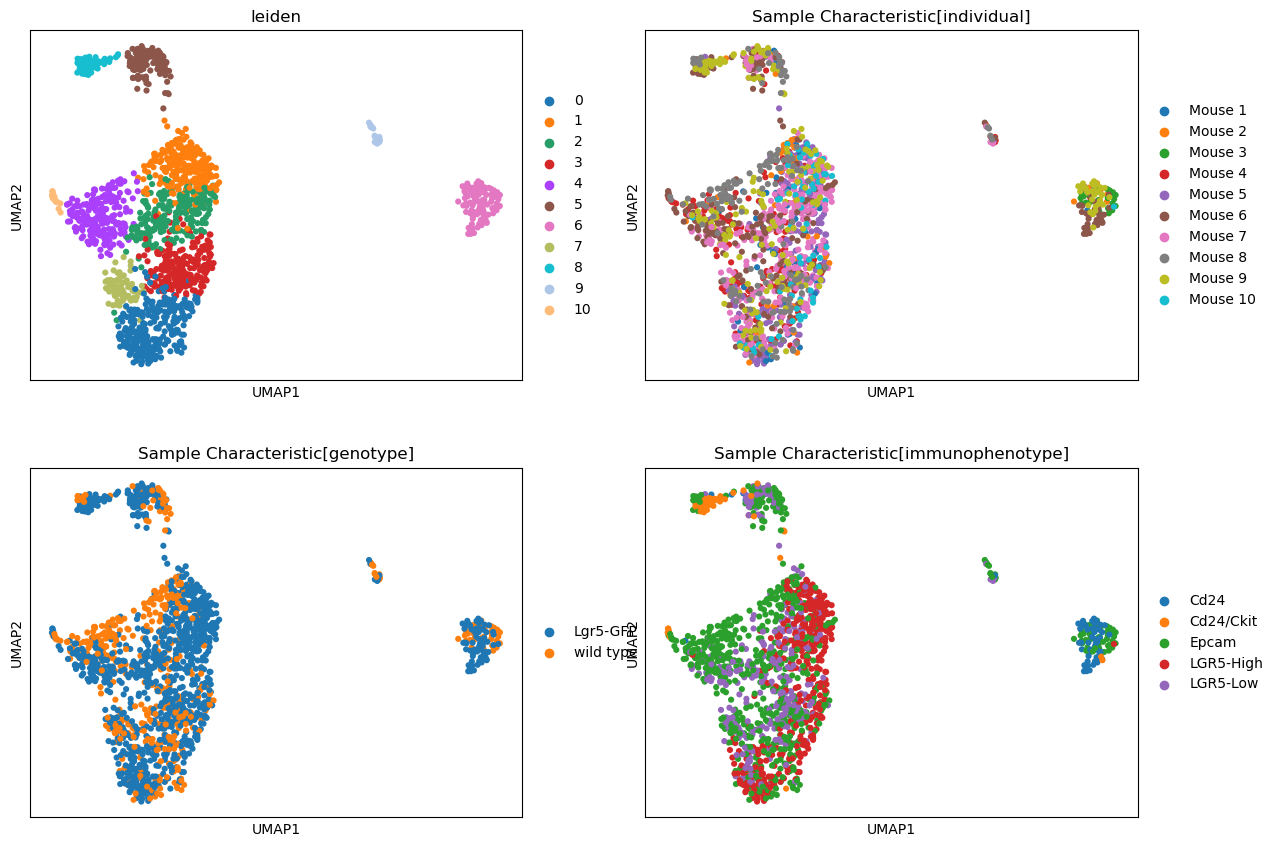

In [14]:
sc.pl.umap(adata, color=["leiden", "Sample Characteristic[individual]", "Sample Characteristic[genotype]", "Sample Characteristic[immunophenotype]"], ncols=2)

In [15]:
keep = adata.var["annot"].str.contains("Def", case=False)
adata.var["annot"][keep]

ENSMUSG00000001482         ENSMUSG00000001482 (Def8)
ENSMUSG00000002257         ENSMUSG00000002257 (Def6)
ENSMUSG00000024215        ENSMUSG00000024215 (Spdef)
ENSMUSG00000043787       ENSMUSG00000043787 (Defb12)
ENSMUSG00000044222       ENSMUSG00000044222 (Defb13)
ENSMUSG00000044748        ENSMUSG00000044748 (Defb1)
ENSMUSG00000044863       ENSMUSG00000044863 (Defb36)
ENSMUSG00000048500       ENSMUSG00000048500 (Defb15)
ENSMUSG00000053678       ENSMUSG00000053678 (Defb40)
ENSMUSG00000053695       ENSMUSG00000053695 (Defb37)
ENSMUSG00000054763       ENSMUSG00000054763 (Defb42)
ENSMUSG00000058052       ENSMUSG00000058052 (Defb35)
ENSMUSG00000058618       ENSMUSG00000058618 (Defa39)
ENSMUSG00000059230        ENSMUSG00000059230 (Defb4)
ENSMUSG00000060070       ENSMUSG00000060070 (Defa26)
ENSMUSG00000060208       ENSMUSG00000060208 (Defa17)
ENSMUSG00000061845       ENSMUSG00000061845 (Defa35)
ENSMUSG00000061958       ENSMUSG00000061958 (Defa38)
ENSMUSG00000062124       ENSMUSG00000062124 (D

In [16]:
paneth_markers = ["Ephb2", "Fzd5", "Lyz1", "Lyz2", "Defa5", "Defa22"]

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 

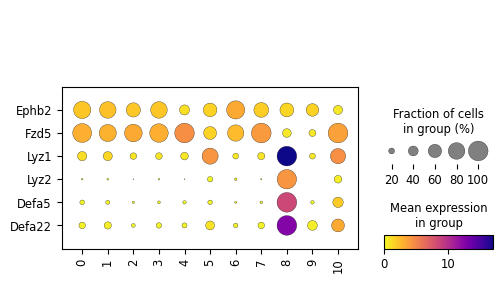

In [17]:
sc.pl.dotplot(adata, groupby="leiden", var_names=paneth_markers, gene_symbols="gene_names", swap_axes=True, cmap="plasma_r")

In [18]:
adata.obs["putative"] = adata.obs["putative"].replace({"8": "paneth"})

/var/folders/md/d6lwwbv97xb6g6ddypntnprh0000gp/T/ipykernel_76486/1386567142.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs["putative"] = adata.obs["putative"].replace({"8": "paneth"})


In [19]:
sc.tl.paga(adata, groups="leiden")

In [20]:
goblet = ["Clca1", "Fcgbp", "Muc2"]
paneth_markers = ["Ephb2", "Fzd5", "Lyz1", "Lyz2", "Defa5", "Defa22"]
tuft_markers=["Pou2f3","Gfi1b", "Trpm5", "Sucnr1", "Ffar3", "Dclk1", "Gnat3"]

int_stem_cells = ['Lgr5','Dclk1', 'Ephb2', 'Msi1', 'Msi2', 'Ascl2', 'Igfbp4']

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 

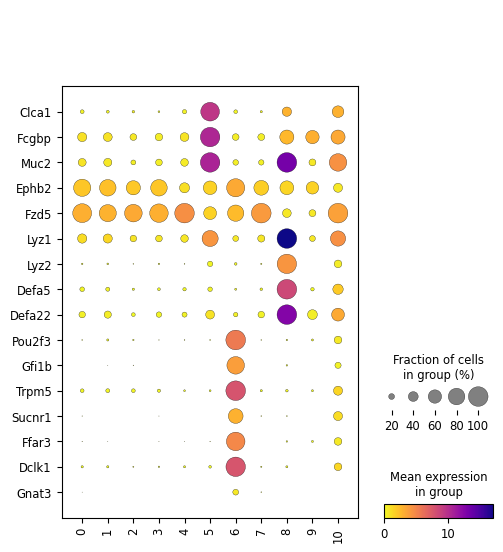

In [21]:
sc.pl.dotplot(adata, groupby="leiden", var_names=goblet+paneth_markers+tuft_markers, gene_symbols="gene_names", swap_axes=True, cmap="plasma_r")

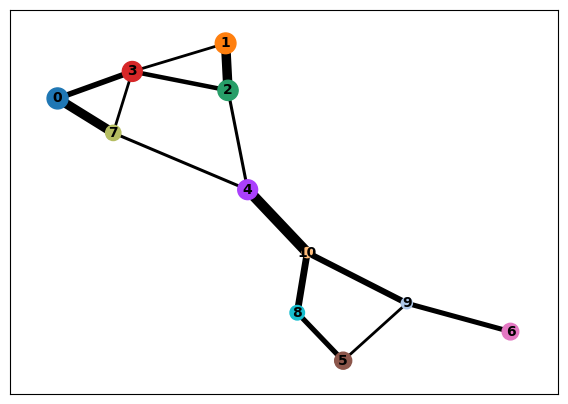

In [22]:
sc.pl.paga(adata, threshold=0.25)

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this w

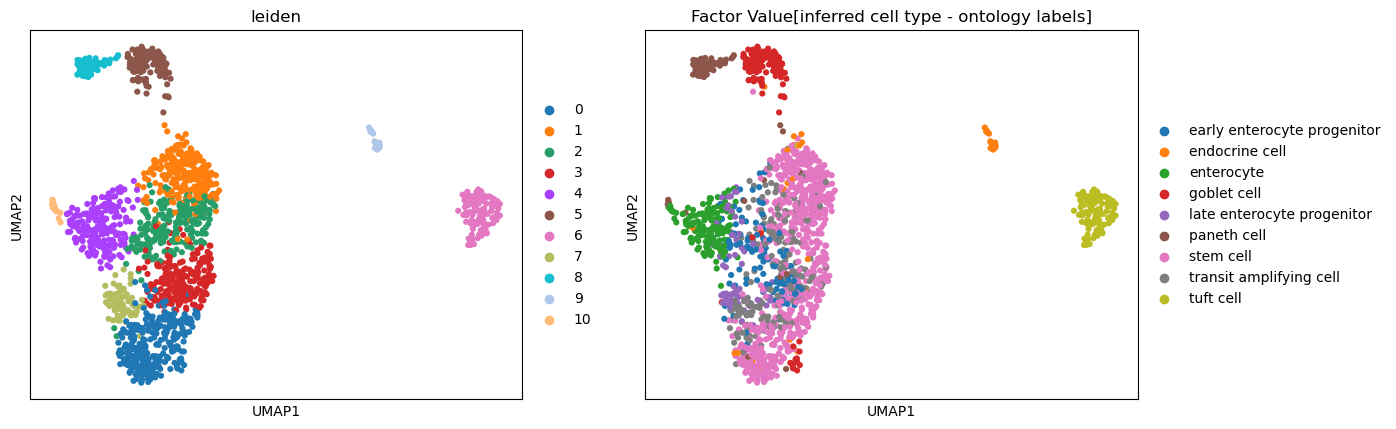

In [23]:
sc.pl.umap(adata, color=["leiden", "Factor Value[inferred cell type - ontology labels]"])